### Reading and Writing Molecules

In [1]:
from rdkit import Chem

In [4]:
ibuprofen = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"
omeprazole = "CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=CC(=C3)OC"

In [9]:
ibuprofen_mol = Chem.MolFromSmiles(ibuprofen)
type(ibuprofen_mol) #If errror, ibuprofen_mol is none

rdkit.Chem.rdchem.Mol

In [30]:
molecules = [ibuprofen, omeprazole]

#converting each molecule in a list
molecules_mol = [Chem.MolFromSmiles(molecule) for molecule in molecules] 

### Reading sets of molecules

In [35]:
#calculating number of atoms each molecule
for molecule in molecules_mol:
    if molecule is None: continue
    print(molecule.GetNumAtoms())

15
24


### Transforming sets of molecules

In [39]:
#Simple iteration for returning a list of smiles from mol

smiles_from_mol = []
for molecule in molecules_mol:
    smiles_from_mol.append(Chem.MolToSmiles(molecule, isomericSmiles=False))
smiles_from_mol

['CC(C)Cc1ccc(C(C)C(=O)O)cc1', 'COc1ccc2[nH]c(S(=O)Cc3ncc(C)c(OC)c3C)nc2c1']

If you’d like to have the Kekule form of the SMILES, first Kekulize the molecule, then use the “kekuleSmiles” option:

In [43]:
#Simple iteration for returning a list of kekule smiles from mol
kekule_from_mol = []

for molecule in molecules_mol:
    Chem.Kekulize(molecule)
    kekule_from_mol.append(Chem.MolToSmiles(molecule, kekuleSmiles = True))
kekule_from_mol

['CC(C)CC1=CC=C(C(C)C(=O)O)C=C1',
 'COC1=CC2=C(C=C1)NC(S(=O)CC1=NC=C(C)C(OC)=C1C)=N2']

### Generating/working with 2D and 3D


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



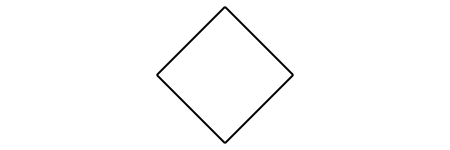

In [60]:
#Generating mol blocks, the're important to generate 3D structures
m2 = Chem.MolFromSmiles("C1CCC1")

print(Chem.MolToMolBlock(m2))
m2 #without the hydrogens

Nota-se que as coordenadas de cada carbono muda, após gerarmos um modelo 2D da molécula


     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0256    0.2491   -0.0964 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0435   -0.2466   -0.0266 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2104   -0.9922   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



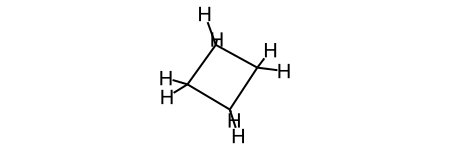

In [63]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m2)
m2_with_hydrogen = Chem.AddHs(m2)

AllChem.EmbedMolecule(m2_with_hydrogen, randomSeed = 0xf00d)

print(Chem.MolToMolBlock(Chem.RemoveHs(m2_with_hydrogen)))
m2_with_hydrogen #with the hydrogens